# DLP

In [1]:
import setup
from circuits import * 
from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA

In [5]:
import numpy as np

In [6]:
import math

In [ ]:
N = 1

In [159]:
def order(x,N):
    assert(N>x)
    if(math.gcd(x,N)!=1):
        return -1
    for i in range(1,N+1):
        if((x**i % N) == 1):
            return i
    

def d_log(g,y,p=p):
    x=1
    while ((g**x % p)!=y):
        x+=1
        if(x>p):
            raise ValueError()
        
    return x

def pol2cart(rho, phi):
    y = rho * np.cos(phi)
    x = rho * np.sin(phi)
    return(x, y)

def dlp(g, p, s):
    I = [i%(p-1) if i>=p else i%p for i in list(range(s, s + int((p-3)/2)+ 1))]

    #dlps = [[i, d_log(g,i,p=p)] for i in range(1,p)]
    dlps = [[i, order(i,N=p)] for i in range(1,p)]
    
    #dlps = [dlp + ["green"] if (dlp[1] in I)  else dlp + ["red"] for dlp in dlps]
    dlps = [dlp + ["None"] if (dlp[1] == -1) else dlp + ["green"] if (dlp[1] in I) else dlp + ["red"] for dlp in dlps]
    [print(dlp) for dlp in dlps if dlp[2]!="None"]

    dlps_order, dlps_log_order, _ = list(zip(*dlps))

    coords_labels = [[pol2cart(1, (dlp[0]-1)*np.pi*2/(p-1)), dlp[2]] for dlp in dlps]

    coords_labels_log = [[pol2cart(1, (dlp[1]-1)*np.pi*2/(p-1)), dlp[2]] for dlp in dlps]

    coords, labels = list(zip(*coords_labels))

    coords_log, _ = list(zip(*coords_labels_log))
    
    s_i = np.array(coords[I[0]-1])
    
    s_f = np.array(coords[I[-1]])
    
    dlp_plot(coords, labels, title=r"$\mathbb{{Z}}^{{*}}_{{{p}}}$".format(p=p))
    
    dlp_plot(coords_log, labels,  diameter=(s_i, s_f), title=r"$\log_{{{g}}}({{\mathbb{{Z}}^{{*}}_{{{p}}}}})$".format(g=g, p=p))
    
def dlp_plot(coords, labels, diameter=None, title=None):
    circle1 = plt.Circle((0, 0), 1, facecolor= 'none', edgecolor='black', linewidth=3, zorder=0)

    
    fig, ax = plt.subplots(figsize=(5,5)) 

    if(diameter):
        plt.plot(*list(zip(*diameter)), color='black', linewidth=3)
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)

    ax.add_patch(circle1)
    
    xs, ys = list(zip(*coords))

    plt.scatter(xs, ys, color=labels, linewidth=3,zorder =5)
    [plt.annotate(str(i), xy=1.2*np.array(coords[i-1]), ha="center", va="center") for i in range(1,len(xs)+1)]
    plt.axis('off')
    
    plt.title(title, fontsize=20, loc='left')
    
    #plt.savefig("./images/DLP/" + ''.join(e for e in title if e.isalnum()) + ".pdf",  bbox_inches='tight')
    
    plt.show()

In [177]:
import sympy as sp

In [181]:
sp.totient(311)

310

In [186]:
p = N = 311

[1, 1, 'red']
[2, 155, 'green']
[3, 155, 'green']
[4, 155, 'green']
[5, 155, 'green']
[6, 5, 'red']
[7, 31, 'green']
[8, 155, 'green']
[9, 155, 'green']
[10, 155, 'green']
[11, 62, 'green']
[12, 155, 'green']
[13, 31, 'green']
[14, 155, 'green']
[15, 31, 'green']
[16, 155, 'green']
[17, 310, 'red']
[18, 31, 'green']
[19, 310, 'red']
[20, 31, 'green']
[21, 155, 'green']
[22, 310, 'red']
[23, 310, 'red']
[24, 31, 'green']
[25, 155, 'green']
[26, 155, 'green']
[27, 155, 'green']
[28, 155, 'green']
[29, 310, 'red']
[30, 155, 'green']
[31, 310, 'red']
[32, 31, 'green']
[33, 310, 'red']
[34, 310, 'red']
[35, 155, 'green']
[36, 5, 'red']
[37, 310, 'red']
[38, 310, 'red']
[39, 155, 'green']
[40, 155, 'green']
[41, 62, 'green']
[42, 155, 'green']
[43, 310, 'red']
[44, 310, 'red']
[45, 155, 'green']
[46, 62, 'green']
[47, 31, 'green']
[48, 155, 'green']
[49, 31, 'green']
[50, 155, 'green']
[51, 62, 'green']
[52, 5, 'red']
[53, 155, 'green']
[54, 155, 'green']
[55, 310, 'red']
[56, 155, 'green']


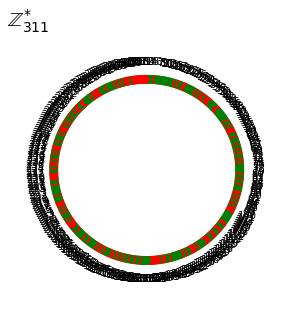

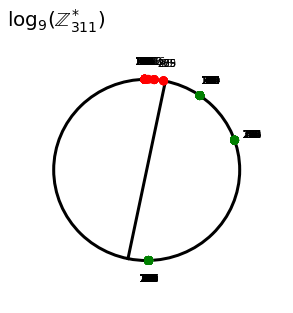

In [187]:
dlp(9,N,11)

In [10]:
p = 29
g = 11
s = 11

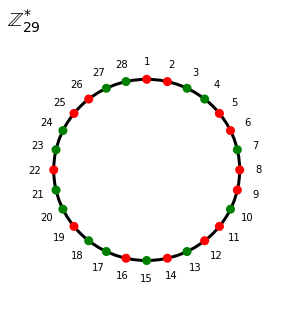

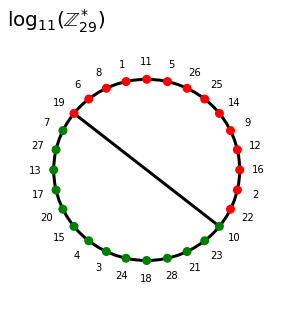

In [11]:
dlp(g,p,s)

# Quadratic Residues

In [2]:
1**2

1

In [3]:
np.gcd(1,2)

1

In [24]:
def residues(n):
    res = np.zeros(n)
    for i in range(n):
        if(np.gcd(i,n) == 1):
            res[i**2 % n] += 1
    return res

In [27]:
residues(7)

array([0., 2., 2., 0., 2., 0., 0.])

In [38]:
residues(10)

array([0., 2., 0., 0., 0., 0., 0., 0., 0., 2.])

In [37]:
residues(15)

array([0., 4., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [48]:
residues(8)

array([0., 4., 0., 0., 0., 0., 0., 0.])

# for i in residues(3*5*7*11*13*17):
    print(i)